# Prediction on Tax Fraud

## Introduction:

In the audit field, identifying fraudulent companies is a key task in ensuring financial transparency and protecting stakeholder interests. One way to help auditors in this process is to develop a classification model that predicts the likelihood of corporate fraud based on current and historical risk factors. However, according to the experiment of Chang and his colleagues, audit risk models are considered to be theoretically ideal conceptual models. Previous audit risk models have been criticized as having low practical value because of the difficulty in quantifying risk factors and our inability to fully express their meaning using precise numbers or terms. (S.Chang et al,2008) The model is designed to automate the detection process and provide auditors with valuable insights to guide their decisions.

In fact, there are many other human factors that can affect audit risk. For example, from a management perspective, the client's management may exert influence on the auditor, according to Porcuna-Enguix et al. In addition, audit risk assessment implies that the auditor must ask questions of parties such as management. (Porcuna-Enguix et al,2021)

The project is conducted to help auditors identify companies that are predicted to be fraudulent by creating a classification model that can predict the presence of corporate fraud based on past risk factors. The data was obtained from one year of non-confidential data from companies collected by an Indian audit office from 2015 to 2016. And this research can be applied to many industries such as industry and agriculture. In addition, the study is authentic and multi-faceted: the combination of data in the dataset takes into account multiple aspects such as audit reports, environmental status reports, persistent problem reports, etc. 

## Method & Result

In the original dataset (Hooda & Nishtha, 2018), there are 27 different variables. This study primarily focuses on variables related to risk, namely RiskA-F, Inherent Risk, Control Risk, Detection Risk, Audit Risk, and Risk. The variable "Risk" consists entirely of 0s and 1s, serving as a categorical variable. A value of 0 indicates no risk or low risk, while 1 represents high risk. The three risks, Inherent Risk, Control Risk, and Detection Risk, are integral components of Audit Risk and have already been utilized in the calculation of Audit Risk. Therefore, this study excludes these redundant columns when establishing the classification model.

Firstly, the remaining risk variables, RiskA-F, are standardized, and the attribute of Risk is transformed into a factor to facilitate subsequent operations. To ensure the training dataset is sufficiently balanced, this study allocates 75% of the data as the training dataset and 25% as the testing dataset. Furthermore, a histogram is used, with Audit Risk as the x-axis, to visually divide the image into two graphs based on the values of Risk: Risk=0 and Risk=1, thus enabling visualization of the testing data.

Next, this study will create a classification model based on the training dataset and find the best k-value:

1. Create a recipe object named "training_recipe." The variable "Risk" is the target variable, while the other variables in the dataset are predictor variables. The training data used for this recipe is "risk_data_train."

2. Create a V-Fold cross-validation object named "training_vfold." The data used for cross-validation is "risk_data_train," and the cross-validation is performed with 5 folds (v = 5). The parameter "strata = Risk" ensures that the cross-validation stratification is based on the "Risk" variable.

3. Configure the k-nearest neighbors mode with the weight function set to "rectangular" and the number of neighbors set to dynamically adjust (neighbors = tune()). The model is specified to use the "kknn" engine and the mode is set to "classification."

4. Create a workflow object named "cross_val" to combine the recipe and model. The workflow is constructed by adding the training recipe, configuring the k-nearest neighbors model, and then tuning the hyperparameters of the model. The tuning is performed through a grid search using the "tune_grid" function. The parameter "resamples" specifies the cross-validation folds (training_vfold), and the parameter "grid" specifies the search range of the "neighbors" parameter from 1 to 40. The results are collected using "collect_metrics()".

5. Create an object named "accuracies" by filtering the cross-validation results (cross_val) to include only the accuracy metric.

6. Create a line plot named "cross_val_plot". The plot represents the average accuracy (y-axis) at different neighbor values (x-axis). The plot includes points and lines to display the trend. The labels for the x-axis and y-axis are set as "Neighbors" and "Accuracy Estimate" respectively. The x-axis scale is set to display breakpoints at intervals of 5.

Next, using best k-value to create our new calssification model:

1. Based on the linear relationship plot between the number of neighbors and the predictive accuracy, as well as the table displaying accuracy values, it can be observed that when k equals 1 or 2, the predictive accuracy of the classification model is both 0.9793088. Therefore, we determine k=2 as the optimal value for constructing our classification model.

2. Configure the new k-nearest neighbors mode with the weight function set to "rectangular" and the number of neighbors set to a sepcifc number (neighbors = 2). The model is specified to use the "kknn" engine and the mode is set to "classification.

3. Use previous recipe ,the new mode and the "fit" function which is called on the workflow to train the model using the "risk_data_train" data.

The "risk_fit" variable contains the trained model and can be used for further analysis or predictions.

Finally,Testing new classification model:

1. Using a model called "risk_fit" to predict the risk values for the test data (risk_data_test). The predict() function is used to generate the predictions, and the bind_cols() function is used to combine the predicted risk values with the original test data. 

2. Calculating evaluation metrics for the predicted risk values. The metrics() function is used, and it takes two arguments: truth, which represents the actual risk values from the test data, and estimate, which represents the predicted risk values (pred_class represents the predicted class labels). 

3. Generating a confusion matrix for the predicted risk values. The conf_mat() function is used, and it requires two arguments: truth, which represents the actual risk values, and estimate, which represents the predicted risk values (pred_class represents the predicted class labels). 

The classification model achieved an impressive accuracy of 96.9%. This remarkable level of accuracy underscores the effectiveness and reliability of the model in making accurate predictions and classifications for the given data. Such a high accuracy rate indicates that the model has successfully captured and learned the underlying patterns and features of the dataset, allowing it to make accurate predictions with great confidence.

## Discussion

The classification model performs admirably in predicting the classification of newly discovered instances as evidenced by the high accuracy of 96.9% obtained in the results. However, the K value of 2 derived from cross-validation appears too small and deviates from our initial expectation. The main reason for this result can be attributed to the fact that most of the data points are concentrated in the range of audit risk = 0, resulting in a relatively small distance between points.

In this study, we focused on the data set associated with risk, and we observed a total of 581 data points. The analysis of the histogram shows that the number of data points corresponding to Risk=0 and Risk=1 is significantly higher than 500 in the range of Audit Risk=0. This observation implies that most of the investigated data are concentrated in the same range, indicating their clustering in the feature space, while smaller K values are more suitable to fit the local structure and class distribution within the dataset.

Based on the classification model constructed in this study, auditors can more effectively identify companies that are at risk of tax fraud in the relevant tax year. However, since this model is built on the 2018 audit dataset, its accuracy may be reduced for audit data beyond 2018. As a result, there may be a risk of omissions or misclassification if the audit department fails to update the data in a timely manner or relies too heavily on the model.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
audit_risk <- read_csv("https://raw.githubusercontent.com/Leoliuubc/dsci-100-project-group43/main/data/audit_risk.csv")
audit_risk

New names:
• `Score_B` -> `Score_B...7`
• `Score_B` -> `Score_B...11`
Rows: 776 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): LOCATION_ID
dbl (26): Sector_score, PARA_A, Score_A, Risk_A, PARA_B, Score_B...7, Risk_B...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B...7,Risk_B,TOTAL,numbers,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5,⋯,0.4,0,0.2,0,2.4,8.574,0.4,0.5,1.7148,1
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5,⋯,0.4,0,0.2,0,2.0,2.554,0.4,0.5,0.5108,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.4,0,0.2,0,2.0,1.548,0.4,0.5,0.3096,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5,⋯,0.4,0,0.2,0,2,1.456,0.4,0.5,0.2912,0
55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5,⋯,0.4,0,0.2,0,2,1.440,0.4,0.5,0.2880,0
55.57,15,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5,⋯,0.4,0,0.2,0,2,1.464,0.4,0.5,0.2928,0


In [3]:
risk_data <- audit_risk |>
                select(contains("Risk_"),Audit_Risk,Risk) 

risk_data_scaled <- risk_data |>
                    mutate(across(Risk_A:Audit_Risk, scale)) |>
                    mutate(Risk = as_factor(Risk))
                           
set.seed(123)

risk_data_split <- initial_split(risk_data_scaled, prop = 0.75, strata = Risk)  
risk_data_train <- training(risk_data_split)   
risk_data_test <- testing(risk_data_split)
risk_data_train
risk_data_test

Risk_A,Risk_B,Risk_C,Risk_D,RiSk_E,Risk_F,Audit_Risk,Risk
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
-0.3630426,-0.2090926,-0.284628,-0.2067866,-0.4101527,-0.1752846,-0.1773727,0
-0.3926899,-0.2051022,-0.284628,-0.1920258,-0.4101527,-0.1752846,-0.1742280,0
0.3014061,-0.2040382,-0.284628,-0.1971295,-0.4101527,-0.1752846,-0.1627661,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.3926899,-0.21062217,-0.284628,-0.20678655,2.3455051,-0.1752846,-0.1512422,1
-0.3926899,-0.04123348,-0.284628,-0.20463498,-0.4101527,-0.1752846,-0.1513457,1
-0.2694501,-0.18934052,-0.284628,0.03473947,-0.4101527,-0.1752846,-0.1227015,1


Risk_A,Risk_B,Risk_C,Risk_D,RiSk_E,Risk_F,Audit_Risk,Risk
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
-0.3926899,-0.1785002,-0.284628,-0.2020831,-0.4101527,-0.1752846,-0.17216938,0
-0.3926899,-0.2100901,-0.284628,-0.2067866,-0.4101527,-0.1752846,-0.17805546,0
-0.2647995,-0.1120615,-0.284628,0.4679552,-0.4101527,-0.1752846,-0.02103468,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.3461843,-0.2068314,-0.284628,-0.2067866,-0.4101527,-0.1752846,-0.1767210,0
-0.3787382,-0.2103562,-0.284628,-0.2067866,-0.4101527,-0.1752846,-0.1778486,0
-0.3810635,-0.2106222,-0.284628,-0.2067866,-0.4101527,-0.1752846,-0.1779313,0


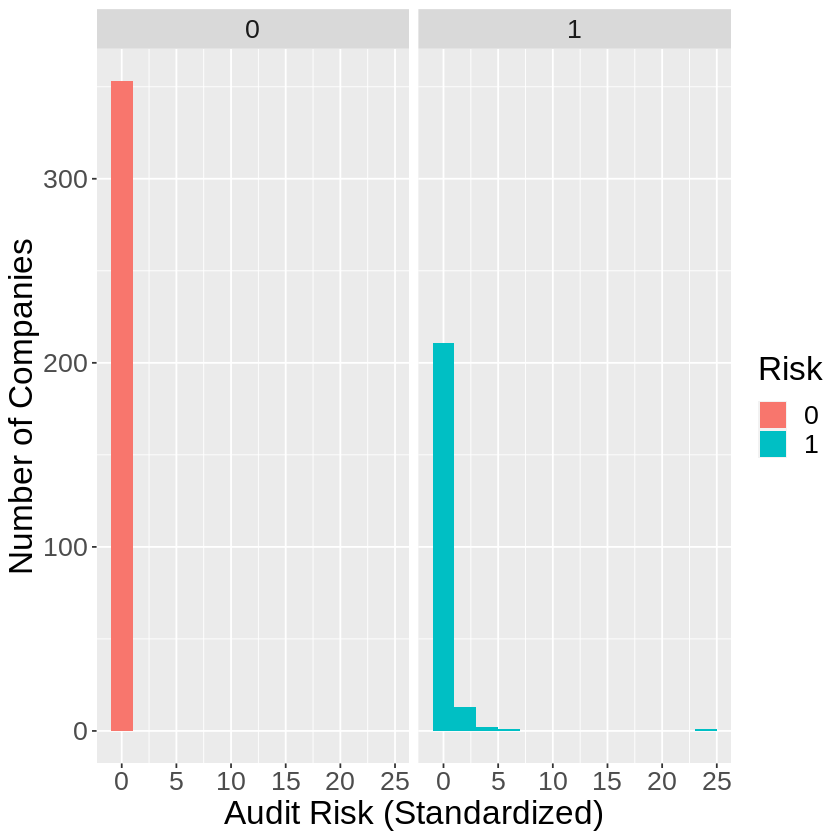

In [4]:
risk_plot <- risk_data_train |>
                ggplot(aes(x = Audit_Risk, fill = Risk)) +
                geom_histogram(stat = "bin", binwidth = 2) +
                labs(x = "Audit Risk (Standardized)", y = "Number of Companies", fill = "Risk") +
                theme(text = element_text(size = 20)) +
                facet_grid(cols = vars(Risk))
risk_plot

In [8]:
set.seed(123) 

training_recipe <- recipe(Risk ~ ., data = risk_data_train)

training_vfold <- vfold_cv(risk_data_train, v = 5, strata = Risk)

training_mode <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                    set_engine("kknn") |>
                    set_mode("classification")

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9793088,5,0.004440602,Preprocessor1_Model01
1,roc_auc,binary,0.9775351,5,0.004219676,Preprocessor1_Model01
2,accuracy,binary,0.9793088,5,0.004440602,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
39,roc_auc,binary,0.9866765,5,0.003964326,Preprocessor1_Model39
40,accuracy,binary,0.9242809,5,0.013075347,Preprocessor1_Model40
40,roc_auc,binary,0.9865529,5,0.004002794,Preprocessor1_Model40


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9793088,5,0.004440602,Preprocessor1_Model01
2,accuracy,binary,0.9793088,5,0.004440602,Preprocessor1_Model02
3,accuracy,binary,0.9725307,5,0.005638651,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
38,accuracy,binary,0.9260201,5,0.01130008,Preprocessor1_Model38
39,accuracy,binary,0.9242809,5,0.01307535,Preprocessor1_Model39
40,accuracy,binary,0.9242809,5,0.01307535,Preprocessor1_Model40


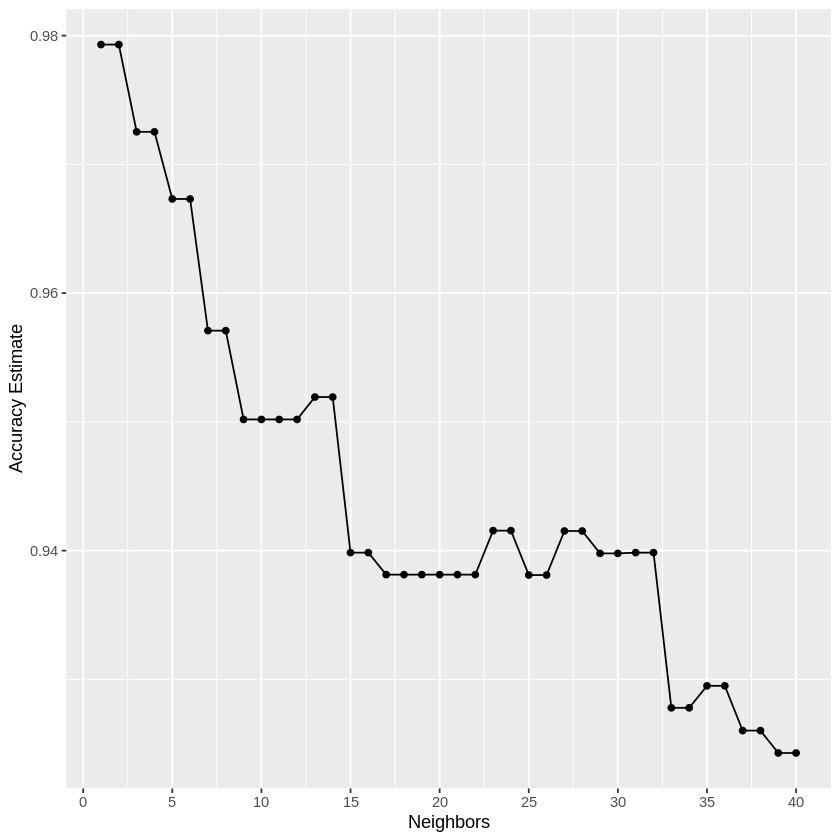

In [9]:
cross_val <- workflow() |>
                add_recipe(training_recipe) |>
                add_model(training_mode) |>
                tune_grid(resamples = training_vfold, grid = tibble(neighbors = seq(from = 1, to = 40, by = 1))) |>
                collect_metrics()
cross_val

accuracies <- cross_val |> 
       filter(.metric == "accuracy")
accuracies

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 50, by = 5))
cross_val_plot

In [11]:
set.seed(123)

risk_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
                    set_engine("kknn") |>
                    set_mode("classification")
risk_spec

risk_fit <- workflow() |>
                add_recipe(training_recipe) |>
                add_model(risk_spec) |>
                fit(data = risk_data_train)
risk_fit

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 2
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(2,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.02409639
Best kernel: rectangular
Best k: 2

In [14]:
set.seed(123) 

risk_predictions <- predict(risk_fit , risk_data_test) |>
                        bind_cols(risk_data_test)  
risk_predictions

risk_metrics<- risk_predictions |>
                    metrics(truth = Risk, estimate = .pred_class) 
risk_metrics

risk_conf_mat <- risk_predictions |>
                    conf_mat(truth = Risk, estimate = .pred_class) 
risk_conf_mat

.pred_class,Risk_A,Risk_B,Risk_C,Risk_D,RiSk_E,Risk_F,Audit_Risk,Risk
<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
0,-0.3926899,-0.1785002,-0.284628,-0.2020831,-0.4101527,-0.1752846,-0.17216938,0
0,-0.3926899,-0.2100901,-0.284628,-0.2067866,-0.4101527,-0.1752846,-0.17805546,0
1,-0.2647995,-0.1120615,-0.284628,0.4679552,-0.4101527,-0.1752846,-0.02103468,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,-0.3461843,-0.2068314,-0.284628,-0.2067866,-0.4101527,-0.1752846,-0.1767210,0
0,-0.3787382,-0.2103562,-0.284628,-0.2067866,-0.4101527,-0.1752846,-0.1778486,0
0,-0.3810635,-0.2106222,-0.284628,-0.2067866,-0.4101527,-0.1752846,-0.1779313,0


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9692308
kap,binary,0.9356152


          Truth
Prediction   0   1
         0 115   3
         1   3  74

## Reference

Hooda,Nishtha. (2018). Audit Data. UCI Machine Learning Repository. https://doi.org/10.24432/C5930Q.

Porcuna-Enguix, L., Bustos-Contell, E., Serrano-Madrid, J., & Labatut-Serer, G. (2021). Constructing the Audit Risk Assessment by the Audit Team Leader When Planning: Using Fuzzy Theory. Mathematics, 9(23), 3065. MDPI AG. Retrieved from http://dx.doi.org/10.3390/math9233065


Chang, S., Tsai, C., Shih, D., Hwang, C.,(2008). The development of audit detection risk assessment system: Using the fuzzy theory and audit risk model,Expert Systems with Applications,
ISSN 0957-4174, https://doi.org/10.1016/j.eswa.2007.08.057.